<a href="https://colab.research.google.com/github/Kashew765/Media-tech_MLproject/blob/main/wine_data_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('wine_data.csv')

# Most frequent wine quality
most_frequent_quality = data['quality'].mode()[0]

# Highest and lowest quality
highest_quality = data['quality'].max()
lowest_quality = data['quality'].min()

print(f"Most frequent wine quality: {most_frequent_quality}")
print(f"Highest wine quality: {highest_quality}")
print(f"Lowest wine quality: {lowest_quality}")


Most frequent wine quality: 5
Highest wine quality: 8
Lowest wine quality: 3


2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

In [9]:
# Correlation matrix
correlations = data.corr()

# Correlation of specific features to quality
fixed_acidity_corr = correlations.loc['quality', 'fixed acidity']
alcohol_corr = correlations.loc['quality', 'alcohol']
free_sulfur_corr = correlations.loc['quality', 'free sulfur dioxide']

print(f"Correlation of fixed acidity to quality: {fixed_acidity_corr}")
print(f"Correlation of alcohol to quality: {alcohol_corr}")
print(f"Correlation of free sulfur dioxide to quality: {free_sulfur_corr}")


Correlation of fixed acidity to quality: 0.12405164911322257
Correlation of alcohol to quality: 0.4761663239995377
Correlation of free sulfur dioxide to quality: -0.05065605724427594


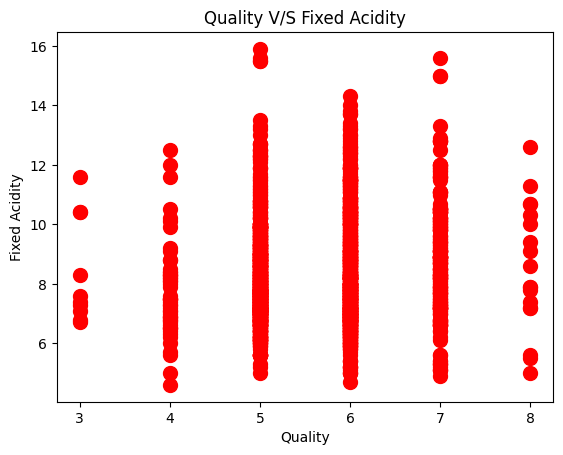

In [10]:
import matplotlib.pyplot as plt
quality = data['quality'].values
acidity = data['fixed acidity'].values
alcohol = data['alcohol'].values
so2 = data['free sulfur dioxide'].values
plt.scatter(quality, acidity, s=100, c='red')
plt.title("Quality V/S Fixed Acidity")
plt.xlabel("Quality")
plt.ylabel("Fixed Acidity")
plt.show()

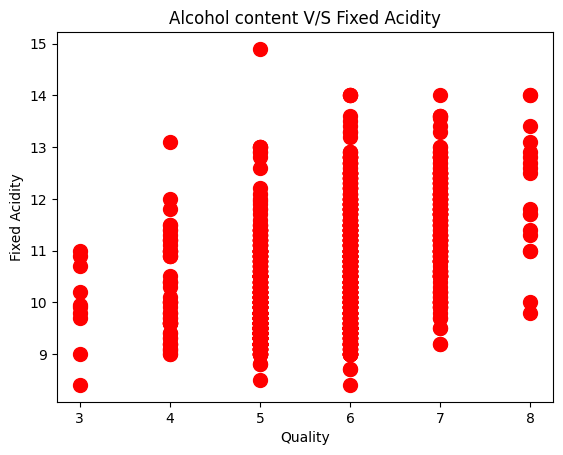

In [11]:
import matplotlib.pyplot as plt
quality = data['quality'].values
acidity = data['fixed acidity'].values
alcohol = data['alcohol'].values
so2 = data['free sulfur dioxide'].values
plt.scatter(quality, alcohol, s=100, c='red')
plt.title("Alcohol content V/S Fixed Acidity")
plt.xlabel("Quality")
plt.ylabel("Fixed Acidity")
plt.show()

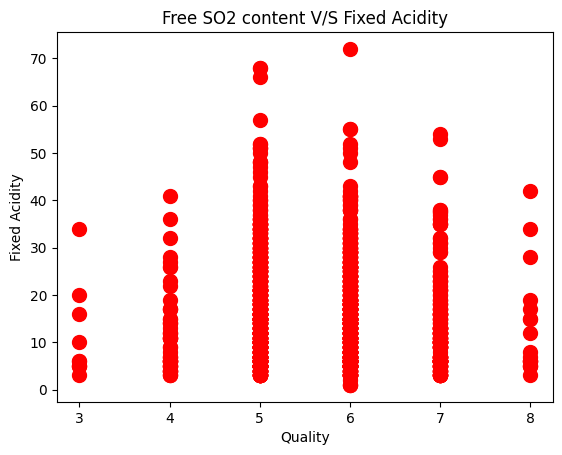

In [12]:
import matplotlib.pyplot as plt
quality = data['quality'].values
acidity = data['fixed acidity'].values
alcohol = data['alcohol'].values
so2 = data['free sulfur dioxide'].values
plt.scatter(quality, so2, s=100, c='red')
plt.title("Free SO2 content V/S Fixed Acidity")
plt.xlabel("Quality")
plt.ylabel("Fixed Acidity")
plt.show()

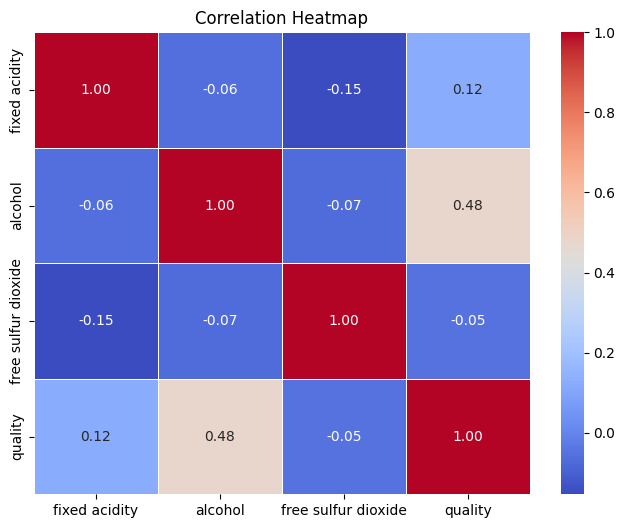

In [5]:
#finding the correlation
correlation=data[['fixed acidity','alcohol','free sulfur dioxide','quality']].corr()

# Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [6]:
# Best quality wines
best_quality_wines = data[data['quality'] == data['quality'].max()]['residual sugar'].mean()

# Lowest quality wines
lowest_quality_wines = data[data['quality'] == data['quality'].min()]['residual sugar'].mean()

print(f"Average residual sugar for best quality wine: {best_quality_wines}")
print(f"Average residual sugar for lowest quality wine: {lowest_quality_wines}")


Average residual sugar for best quality wine: 2.5777777777777775
Average residual sugar for lowest quality wine: 2.6350000000000002


4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

In [ ]:
volatile_acidity_corr = correlations.loc['quality', 'volatile acidity']
print(f"Correlation of volatile acidity to quality: {volatile_acidity_corr}")


Correlation of volatile acidity to quality: -0.390557780264006


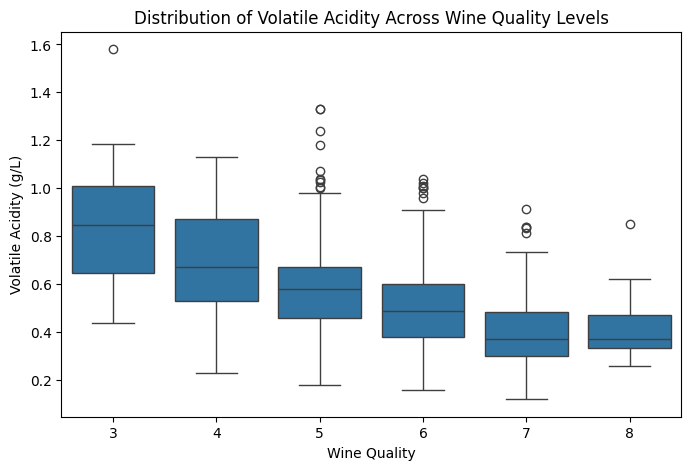

In [7]:
# Boxplot to compare volatile acidity across different quality levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["quality"], y=data["volatile acidity"])
plt.title("Distribution of Volatile Acidity Across Wine Quality Levels")
plt.xlabel("Wine Quality")
plt.ylabel("Volatile Acidity (g/L)")
plt.show()

5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")


Decision Tree Accuracy: 0.559375
Random Forest Accuracy: 0.659375
